## Accumulation/Distribution Index

$$\mathrm{MFM}_t = \frac{(C_t - L_t) - (H_t - C_t)}{(H_t - L_t)}$$

여기서 MFM은 money flow multiplier, $C_t$는 종가, $L_t$는 저가, $H_t$는 고가를 의미한다. MFM을 계산하면 다음과 같이 MFV를 계산할 수 있다

$$\mathrm{MFV} = \mathrm{MFM} \times \mbox{period volune}$$

$$\mathrm{A/D}_t = \mbox{A/D}_{t-1} + \mathrm{CMFV}$$

여기서 CMFV는 current priod money flow volume을 의미한다.

### Documentation

Accumulation / Distribution Index(누적/분배 지수)는 주식 시장에서 자산의 누적 수요와 공급을 측정하기 위해 사용되는 기술적 분석 도구이다. 

이 지수의 증가는 구매자들이 주도하고 있다는 신호로 해석되며, 주식이 누적되고 있다는 것을 의미한다. 

반면, 지수의 감소는 판매자가 시장을 지배하고 있으며, 주식이 분산되고 있다는 신호로 해석될 수 있다. 그러므로, 이 지수는 시장의 강세와 약세 동향을 파악하는 데 유용하게 사용될 수 있다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import acc_dist_index
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
acc_dist = acc_dist_index(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    volume = data['Volume'],
    fillna = False
)

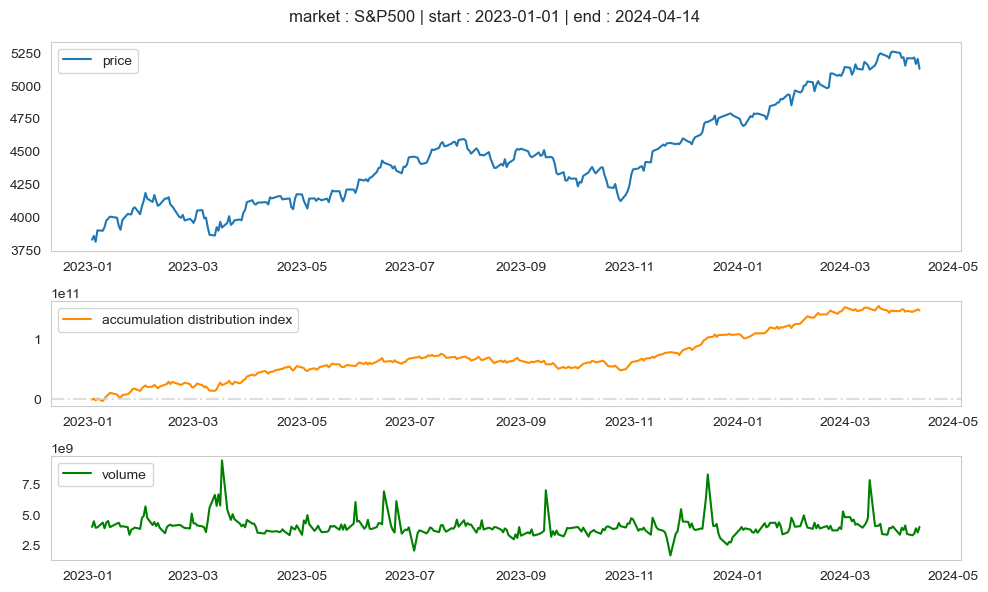

In [4]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'])
plt.grid(False)
plt.legend(['price'])

plt.subplot(gs[1])
plt.plot(acc_dist, color = 'darkorange')
plt.grid(False)
plt.axhline(y = 50, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['accumulation distribution index'])

plt.subplot(gs[2])
plt.plot(data['Volume'], color = 'green')
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()